# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

*Note: This notebook is using Tensorflow 2.0, not 1.x due to its deprecation.  The construction of the network was using the Keras interface of TF 2.0.  In addition, the visualisation of the activations has been modified to use TF 2.0 to complete the optional step.  If you have not installed TF 2.0, please install it before running this notebook.  You can run the cell below if you so desire.  Please also consider using a virtual or conda environment so it doesn't interfere with your base Python installation.*

In [0]:
!pip install "tensorflow>=2.0"

In [1]:
## Added by Ray to run in Colab
# Download the data and move to the data directory
!wget https://s3-us-west-1.amazonaws.com/udacity-selfdrivingcar/traffic-signs-data.zip
!unzip traffic-signs-data.zip
!mkdir data
!mv *.p data
!rm traffic-signs-data.zip

--2020-05-21 06:50:01--  https://s3-us-west-1.amazonaws.com/udacity-selfdrivingcar/traffic-signs-data.zip
Resolving s3-us-west-1.amazonaws.com (s3-us-west-1.amazonaws.com)... 52.219.24.161
Connecting to s3-us-west-1.amazonaws.com (s3-us-west-1.amazonaws.com)|52.219.24.161|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 123524425 (118M) [application/zip]
Saving to: ‘traffic-signs-data.zip’

traffic-signs-data. 100%[===================>] 117.80M  81.5MB/s    in 1.4s    

2020-05-21 06:50:03 (81.5 MB/s) - ‘traffic-signs-data.zip’ saved [123524425/123524425]

Archive:  traffic-signs-data.zip
  inflating: test.p                  
  inflating: train.p                 
  inflating: valid.p                 


---
## Step 0: Load The Data

In [0]:
# Load pickled data
import pickle

# TODO: Fill this in based on where you saved the training and testing data

training_file = 'data/train.p'
validation_file = 'data/valid.p'
testing_file = 'data/test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [6]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results

# TODO: Number of training examples
n_train = X_train.shape[0]

# TODO: Number of validation examples
n_validation = X_valid.shape[0]

# TODO: Number of testing examples.
n_test = X_test.shape[0]

# TODO: What's the shape of an traffic sign image?
image_shape = X_train.shape[1:]

# TODO: How many unique classes/labels there are in the dataset.
n_classes = len(set(y_train))

print("Number of training examples =", n_train)
print("Number of validation examples =", n_validation)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of validation examples = 4410
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


In [0]:
## Added by Ray - Also added in the labels from the CSV file
!wget https://raw.githubusercontent.com/udacity/CarND-Traffic-Sign-Classifier-Project/master/signnames.csv
!mv signnames.csv data

--2020-05-20 11:55:47--  https://raw.githubusercontent.com/udacity/CarND-Traffic-Sign-Classifier-Project/master/signnames.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 999 [text/plain]
Saving to: ‘signnames.csv’

signnames.csv       100%[===================>]     999  --.-KB/s    in 0s      

2020-05-20 11:55:47 (64.2 MB/s) - ‘signnames.csv’ saved [999/999]



Let's also show what the labels look like for the signs

In [0]:
import pandas as pd
from IPython.display import display
labels = pd.read_csv('data/signnames.csv')
labels.set_index(keys='ClassId', inplace=True)
display(labels)

,SignName
ClassId,
0,Speed limit (20km/h)
1,Speed limit (30km/h)
2,Speed limit (50km/h)
3,Speed limit (60km/h)
4,Speed limit (70km/h)
5,Speed limit (80km/h)
6,End of speed limit (80km/h)
7,Speed limit (100km/h)
8,Speed limit (120km/h)


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc. 

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections. It can be interesting to look at the distribution of classes in the training, validation and test set. Is the distribution the same? Are there more examples of some classes than others?

In [0]:
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
# Visualizations will be shown in the notebook.
%matplotlib inline

In [0]:
plt.rcParams['figure.figsize'] = (16, 12)

Let us plot the distribution of the labels for the training, validation and test datsaets

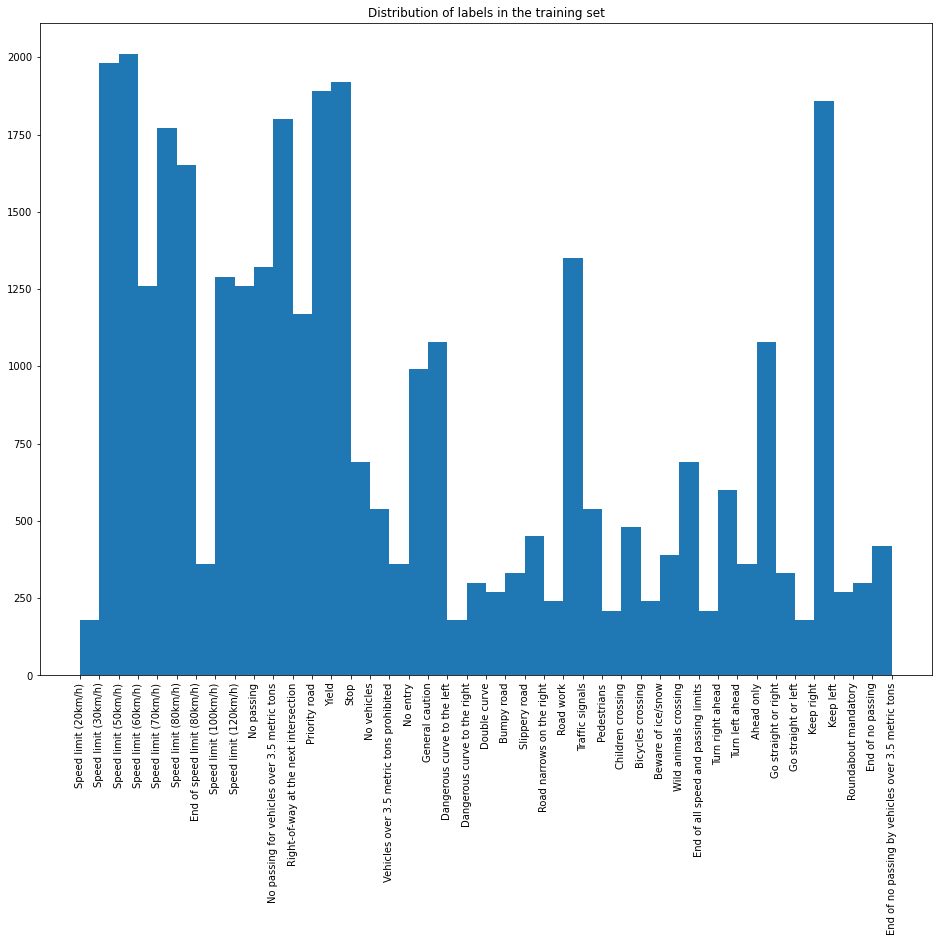

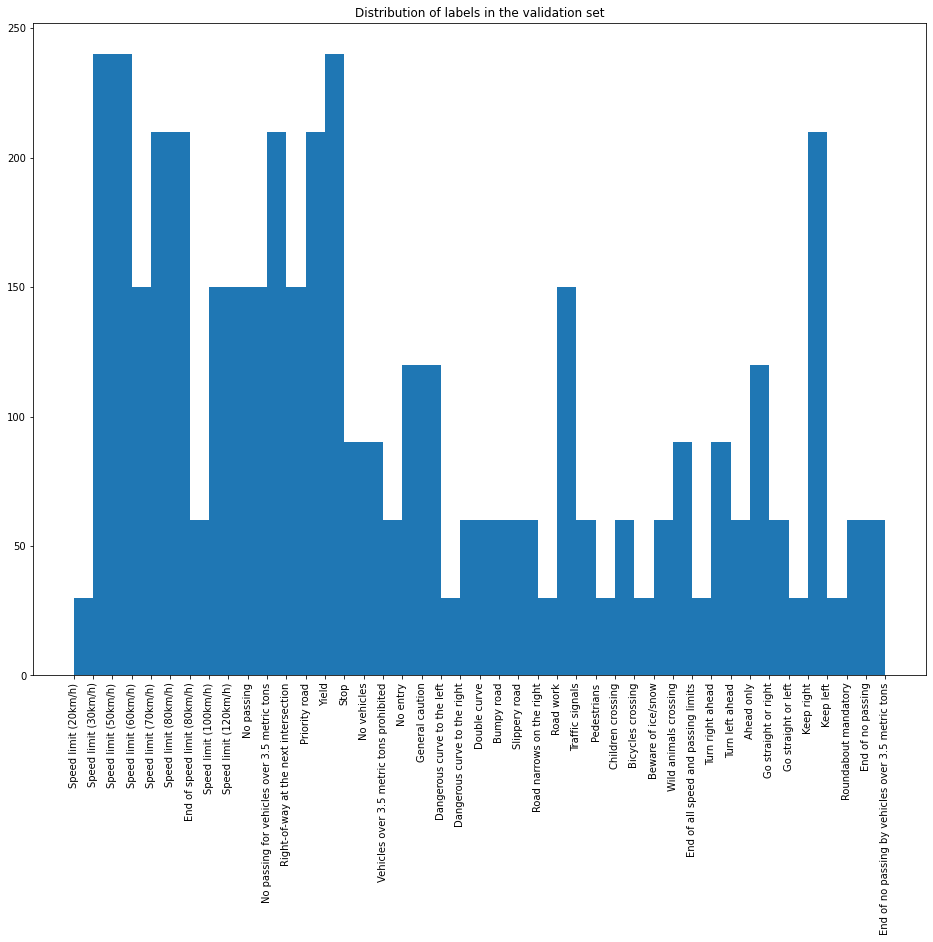

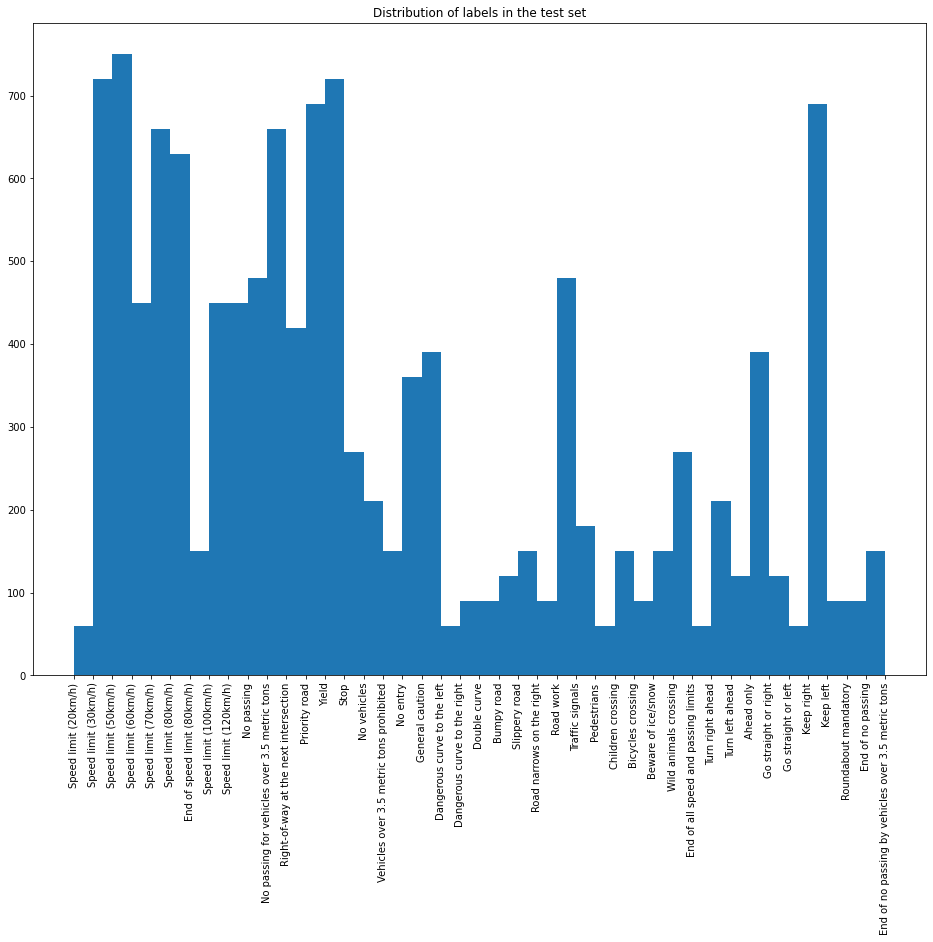

In [0]:
for y, l in zip([y_train, y_valid, y_test], ['training', 'validation', 'test']):
    plt.figure()
    plt.hist(y, bins=range(n_classes))
    plt.title('Distribution of labels in the {} set'.format(l))
    _ = plt.xticks(range(n_classes), labels['SignName'].values, rotation='vertical')

We can see that the shapes of the histograms are roughly the same regardless of the type of set.  This means that the class imbalance is intentional which could indicate that there are some traffic signs that occur more rarely than others.   Let's also have a look at some traffic signs just in case.

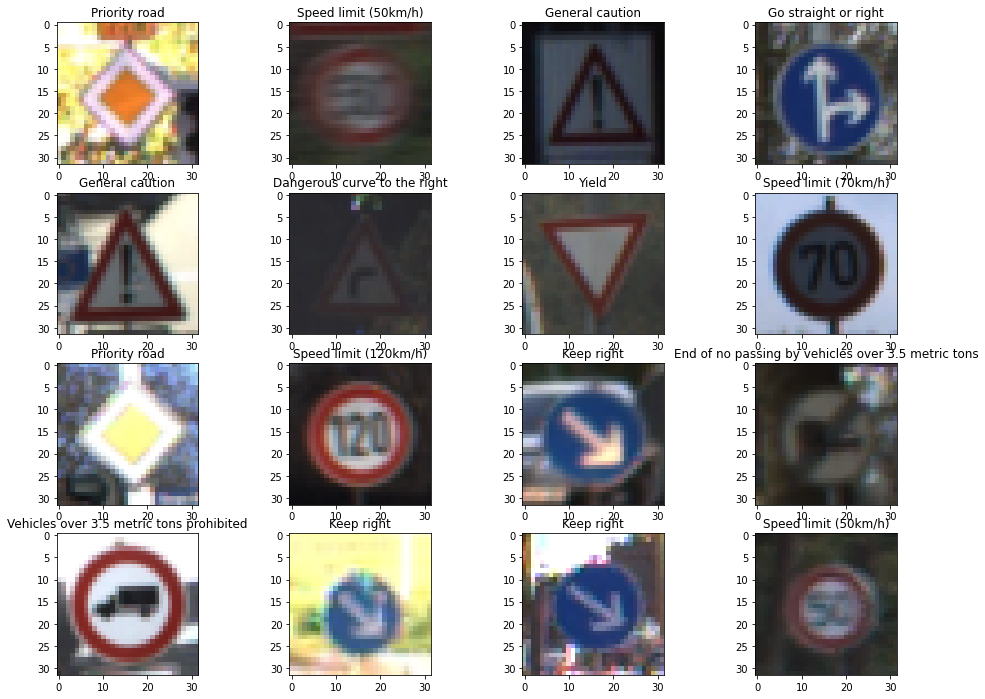

In [0]:
import numpy as np
plt.figure()
ind = np.random.permutation(n_train)[:16]
X_random = X_train[ind]
y_random = y_train[ind]
for i in range(16):
    plt.subplot(4, 4, i + 1)
    plt.imshow(X_random[i])
    plt.title(labels.loc[y_random[i], 'SignName'])

We can see that the signs vary in lighting, composition and location.

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Pre-process the Data Set (normalization, grayscale, etc.)

Minimally, the image data should be normalized so that the data has mean zero and equal variance. For image data, `(pixel - 128)/ 128` is a quick way to approximately normalize the data and can be used in this project. 

Other pre-processing steps are optional. You can try different techniques to see if it improves performance. 

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

In [0]:
### Preprocess the data here. It is required to normalize the data. Other preprocessing steps could include 
### converting to grayscale, etc.
### Feel free to use as many code cells as needed.
# Normalise the data
X_train_norm = (X_train.astype(np.float32) - 128) / 128
X_valid_norm = (X_valid.astype(np.float32) - 128) / 128
X_test_norm = (X_test.astype(np.float32) - 128) / 128

### Model Architecture

In [0]:
import tensorflow as tf

In [0]:
### Define your architecture here.
### Feel free to use as many code cells as needed.
## Note - I'll be using TensorFlow 2.0 here because 1.x is just flat out old.
## Sorry!
## Note that on the Udacity forums, we are allowed to use any version of TF:
## https://knowledge.udacity.com/questions/128267
def define_traffic_sign_architecture():
    ## Architecture inspired by Andrej Karpathy's blog
    # https://cs231n.github.io/convolutional-networks/#architectures
    # INPUT -> [CONV -> RELU -> POOL]*2 -> FC -> RELU -> FC
    # 32 x 32 x 3
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Input(shape=(32, 32, 3), name='input'))
    # 28 x 28 x 16
    model.add(tf.keras.layers.Conv2D(filters=16, kernel_size=(5, 5), name='conv1'))
    model.add(tf.keras.layers.ReLU(name='relu1'))
    # 14 x 14 x 16
    model.add(tf.keras.layers.MaxPool2D(pool_size=(2, 2), strides=(2, 2), name='pool1'))
    # 10 x 10 x 32
    model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=(5, 5), name='conv2'))
    model.add(tf.keras.layers.ReLU(name='relu2'))
    # 5 x 5 x 32
    model.add(tf.keras.layers.MaxPool2D(pool_size=(2, 2), strides=(2, 2), name='pool2'))    
    # Flatten
    model.add(tf.keras.layers.Flatten(name='flatten'))

    # Add dropout to reduce overfitting
    model.add(tf.keras.layers.Dropout(rate=0.5, name='dropout1'))
    model.add(tf.keras.layers.Dense(512, name='fc1'))
    model.add(tf.keras.layers.ReLU(name='relu_fc1'))
    model.add(tf.keras.layers.Dropout(rate=0.5, name='dropout2'))
    model.add(tf.keras.layers.Dense(n_classes, name='fc2'))
    model.add(tf.keras.layers.Softmax(name='softmax'))

    return model

### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

In [0]:
# Create model
model = define_traffic_sign_architecture()
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1 (Conv2D)               (None, 28, 28, 16)        1216      
_________________________________________________________________
relu1 (ReLU)                 (None, 28, 28, 16)        0         
_________________________________________________________________
pool1 (MaxPooling2D)         (None, 14, 14, 16)        0         
_________________________________________________________________
conv2 (Conv2D)               (None, 10, 10, 32)        12832     
_________________________________________________________________
relu2 (ReLU)                 (None, 10, 10, 32)        0         
_________________________________________________________________
pool2 (MaxPooling2D)         (None, 5, 5, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 800)              

In [0]:
### Train your model here.
### Calculate and report the accuracy on the training and validation set.
### Once a final model architecture is selected, 
### the accuracy on the test set should be calculated and reported as well.
### Feel free to use as many code cells as needed.

# Model checkpoint - save the model with the highest validation accuracy
filepath = "/tmp/checkpoint/best_weights.hdf5"
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=filepath,
    save_weights_only=False,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)

# Compile the model
# Use Adam optimizer with learning rate 1e-3 with categorical cross-entropy
# We can use SPARSE categorical cross-entropy so we don't have to convert
# to one-hot encoding.  The labels are already in single digit form, so take
# advantage of that.  Metrics to monitor are accuracy.
model.compile(
    optimizer=tf.keras.optimizers.Adam(1e-3),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics=["accuracy"]
)

# Train for 50 epochs, batch size 64
# Also let's have a look at the validation performance
model.fit(X_train_norm, y_train, epochs=50, batch_size=64,
          validation_data=(X_valid_norm, y_valid), verbose=1,
          callbacks=[model_checkpoint_callback])

Epoch 1/50
544/544 [==============================] - 2s 4ms/step - loss: 1.2480 - accuracy: 0.6465 - val_loss: 0.4169 - val_accuracy: 0.8991
Epoch 2/50
544/544 [==============================] - 2s 3ms/step - loss: 0.3322 - accuracy: 0.8989 - val_loss: 0.2294 - val_accuracy: 0.9315
Epoch 3/50
544/544 [==============================] - 2s 3ms/step - loss: 0.2191 - accuracy: 0.9345 - val_loss: 0.2036 - val_accuracy: 0.9451
Epoch 4/50
544/544 [==============================] - 2s 3ms/step - loss: 0.1670 - accuracy: 0.9503 - val_loss: 0.1298 - val_accuracy: 0.9655
Epoch 5/50
544/544 [==============================] - 2s 3ms/step - loss: 0.1382 - accuracy: 0.9574 - val_loss: 0.1584 - val_accuracy: 0.9528
Epoch 6/50
544/544 [==============================] - 2s 3ms/step - loss: 0.1278 - accuracy: 0.9602 - val_loss: 0.1738 - val_accuracy: 0.9646
Epoch 7/50
544/544 [==============================] - 2s 4ms/step - loss: 0.1098 - accuracy: 0.9666 - val_loss: 0.1180 - val_accuracy: 0.9698
Epoch 

In [0]:
!mkdir models

In [0]:
# Save the model
# Make sure you maintain the weights that had the best validation accuracy
model.load_weights(filepath)
model.save('models/traffic_sign.hdf5')

This looks like it's performing pretty well on the training and validation.  Let's try evaluating this on the test dataset.

In [0]:
output = model.evaluate(X_test_norm, y_test)
print(f'Cross-Entropy Loss: {output[0]}')
print(f'Accuracy: {output[1]}')

395/395 [==============================] - 1s 2ms/step - loss: 0.2074 - accuracy: 0.9622
Cross-Entropy Loss: 0.2073660045862198
Accuracy: 0.9621536135673523


---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

In [0]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.

## Download images from the Internet and make them available here
from PIL import Image
import requests
from io import BytesIO
import cv2

image_urls = ["https://raw.githubusercontent.com/Goddard/udacity-traffic-sign-classifier/master/write-up/1.png",
              "https://raw.githubusercontent.com/Goddard/udacity-traffic-sign-classifier/master/write-up/2.png",
              "https://raw.githubusercontent.com/Goddard/udacity-traffic-sign-classifier/master/write-up/3.png",
              "https://raw.githubusercontent.com/Goddard/udacity-traffic-sign-classifier/master/write-up/4.png",
              "https://raw.githubusercontent.com/Goddard/udacity-traffic-sign-classifier/master/write-up/5.png",
              "https://raw.githubusercontent.com/Goddard/udacity-traffic-sign-classifier/master/write-up/6.png"]

# This will contain the list of our images as NumPy arrays, resized to 32 x 32
images = []
for url in image_urls:
    print('Downloading: ' + url)
    response = requests.get(url)
    img = Image.open(BytesIO(response.content))
    img = np.array(img)
    img = cv2.resize(img, (32, 32))
    images.append(img)

Downloading: https://raw.githubusercontent.com/Goddard/udacity-traffic-sign-classifier/master/write-up/1.png
Downloading: https://raw.githubusercontent.com/Goddard/udacity-traffic-sign-classifier/master/write-up/2.png
Downloading: https://raw.githubusercontent.com/Goddard/udacity-traffic-sign-classifier/master/write-up/3.png
Downloading: https://raw.githubusercontent.com/Goddard/udacity-traffic-sign-classifier/master/write-up/4.png
Downloading: https://raw.githubusercontent.com/Goddard/udacity-traffic-sign-classifier/master/write-up/5.png
Downloading: https://raw.githubusercontent.com/Goddard/udacity-traffic-sign-classifier/master/write-up/6.png


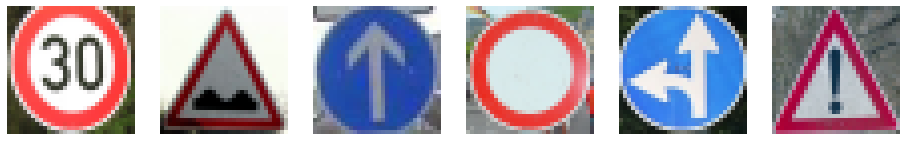

In [0]:
## Show the images
plt.figure()
for i in range(6):
    plt.subplot(1, 6, i+1)
    plt.imshow(images[i])
    plt.axis('off')

### Predict the Sign Type for Each Image

In [0]:
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.
### Feel free to use as many code cells as needed.
# Convert images into NumPy array - first dim is the batch size
images = np.array(images)
# Normalise the images like we did before
images_norm = (images.astype(np.float32) - 128) / 128
# Infer the label - note that this will give us probabilities - each image
# is contained in a row
y_new = model.predict(images_norm)

In [0]:
# Find the most probable class for each image
classes = np.argmax(y_new, axis=1)

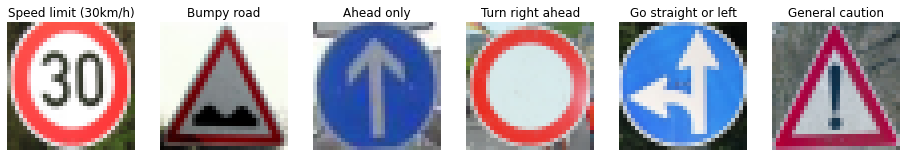

In [0]:
# Plot the images with their predicted labels in the title
plt.figure()
for i in range(6):
    plt.subplot(1, 6, i+1)
    plt.imshow(images[i])
    plt.axis('off')
    plt.title(labels.loc[classes[i], 'SignName'])

### Analyze Performance

In [0]:
### Calculate the accuracy for these 5 new images. 
### For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate on these new images.

## Looks like it got all of them right!  See above

### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tf.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

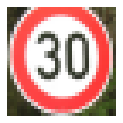

Image #1
Class #1 - Speed limit (30km/h) - Probability: 1.0
Class #2 - Speed limit (50km/h) - Probability: 1.2542992200437197e-09
Class #3 - Roundabout mandatory - Probability: 4.2202660810453096e-10
Class #4 - Keep right - Probability: 1.1772216534922109e-10
Class #5 - End of speed limit (80km/h) - Probability: 7.537577333127654e-12



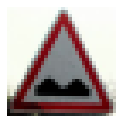

Image #2
Class #1 - Bumpy road - Probability: 0.9999980926513672
Class #2 - Bicycles crossing - Probability: 1.9274636997579364e-06
Class #3 - No vehicles - Probability: 4.024740818397987e-10
Class #4 - Road work - Probability: 8.699659916067137e-12
Class #5 - Traffic signals - Probability: 6.647298163298121e-12



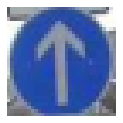

Image #3
Class #1 - Ahead only - Probability: 0.9999998807907104
Class #2 - Go straight or right - Probability: 1.2893966072624607e-07
Class #3 - Turn right ahead - Probability: 1.7854874523326458e-10
Class #4 - Road work - Probability: 2.92059362805297e-11
Class #5 - Roundabout mandatory - Probability: 1.2371377793723992e-12



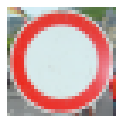

Image #4
Class #1 - Turn right ahead - Probability: 0.4148518145084381
Class #2 - No vehicles - Probability: 0.39023715257644653
Class #3 - Roundabout mandatory - Probability: 0.14847058057785034
Class #4 - Keep right - Probability: 0.04245895519852638
Class #5 - Ahead only - Probability: 0.002139888470992446



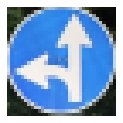

Image #5
Class #1 - Go straight or left - Probability: 1.0
Class #2 - Roundabout mandatory - Probability: 2.3739414947709925e-11
Class #3 - Keep left - Probability: 3.119415668698458e-15
Class #4 - Turn right ahead - Probability: 8.128294921463757e-17
Class #5 - General caution - Probability: 3.731395613204763e-18



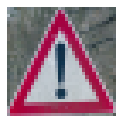

Image #6
Class #1 - General caution - Probability: 1.0
Class #2 - Pedestrians - Probability: 1.2275169709380838e-24
Class #3 - Traffic signals - Probability: 1.2176799961729185e-33
Class #4 - Go straight or left - Probability: 1.5617133512782678e-34
Class #5 - Roundabout mandatory - Probability: 1.0926069861380888e-36



In [0]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 
### Feel free to use as many code cells as needed.
## Using TF 2.0 API
values, indices = tf.math.top_k(y_new, k=5)
values = values.numpy()
indices = indices.numpy()
for i in range(6):
    plt.figure(figsize=(2, 2))
    plt.imshow(images[i])
    plt.axis('off')
    plt.show()
    print('Image #' + str(i + 1))
    for j in range(5):
        print('Class #{} - {} - Probability: {}'.format(
            j + 1, labels.loc[indices[i, j], 'SignName'], values[i, j]))
    print()

### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

---

## Step 4 (Optional): Visualize the Neural Network's State with Test Images

 This Section is not required to complete but acts as an additional excersise for understaning the output of a neural network's weights. While neural networks can be a great learning device they are often referred to as a black box. We can understand what the weights of a neural network look like better by plotting their feature maps. After successfully training your neural network you can see what it's feature maps look like by plotting the output of the network's weight layers in response to a test stimuli image. From these plotted feature maps, it's possible to see what characteristics of an image the network finds interesting. For a sign, maybe the inner network feature maps react with high activation to the sign's boundary outline or to the contrast in the sign's painted symbol.

 Provided for you below is the function code that allows you to get the visualization output of any tensorflow weight layer you want. The inputs to the function should be a stimuli image, one used during training or a new one you provided, and then the tensorflow variable name that represents the layer's state during the training process, for instance if you wanted to see what the [LeNet lab's](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) feature maps looked like for it's second convolutional layer you could enter conv2 as the tf_activation variable.

For an example of what feature map outputs look like, check out NVIDIA's results in their paper [End-to-End Deep Learning for Self-Driving Cars](https://devblogs.nvidia.com/parallelforall/deep-learning-self-driving-cars/) in the section Visualization of internal CNN State. NVIDIA was able to show that their network's inner weights had high activations to road boundary lines by comparing feature maps from an image with a clear path to one without. Try experimenting with a similar test to show that your trained network's weights are looking for interesting features, whether it's looking at differences in feature maps from images with or without a sign, or even what feature maps look like in a trained network vs a completely untrained one on the same sign image.

<figure>
 <img src="https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/visualize_cnn.png?raw=1" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your output should look something like this (above)</p> 
 </figcaption>
</figure>
 <p></p> 


In [0]:
# ### Visualize your network's feature maps here.
# ### Feel free to use as many code cells as needed.

# # image_input: the test image being fed into the network to produce the feature maps
# # tf_activation: should be a tf variable name used during your training procedure that represents the calculated state of a specific weight layer
# # activation_min/max: can be used to view the activation contrast in more detail, by default matplot sets min and max to the actual min and max values of the output
# # plt_num: used to plot out multiple different weight feature map sets on the same block, just extend the plt number for each new feature map entry

# def outputFeatureMap(image_input, tf_activation, activation_min=-1, activation_max=-1 ,plt_num=1):
#     # Here make sure to preprocess your image_input in a way your network expects
#     # with size, normalization, ect if needed
#     # image_input =
#     # Note: x should be the same name as your network's tensorflow data placeholder variable
#     # If you get an error tf_activation is not defined it may be having trouble accessing the variable from inside a function
#     activation = tf_activation.eval(session=sess,feed_dict={x : image_input})
#     featuremaps = activation.shape[3]
#     plt.figure(plt_num, figsize=(15,15))
#     for featuremap in range(featuremaps):
#         plt.subplot(6,8, featuremap+1) # sets the number of feature maps to show on each row and column
#         plt.title('FeatureMap ' + str(featuremap)) # displays the feature map number
#         if activation_min != -1 & activation_max != -1:
#             plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin =activation_min, vmax=activation_max, cmap="gray")
#         elif activation_max != -1:
#             plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmax=activation_max, cmap="gray")
#         elif activation_min !=-1:
#             plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin=activation_min, cmap="gray")
#         else:
#             plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", cmap="gray")

In [0]:
## Print out all of the layer names
for layer in model.layers:
    print(layer.name)

conv1
relu1
pool1
conv2
relu2
pool2
flatten
dropout1
fc1
relu_fc1
dropout2
fc2
softmax


In [0]:
### Redesigned using TF 2.0 API
def outputFeatureMap(image_input, model, layer_name, activation_min=-1, activation_max=-1 ,plt_num=1):
    # Here make sure to preprocess your image_input in a way your network expects
    # with size, normalization, ect if needed
    image_norm = (image_input.astype(np.float32) - 128) / 128
    # Note: we must introduce a singleton dimension at
    # axis=0 as the first dimension is expected to be the batch size.
    image_norm = image_norm[None]

    # Search for the layer with the matching layer name
    layer_out = None
    for layer in model.layers:
        if layer.name == layer_name:
            layer_out = layer
            break
    if layer_out is None:
        print('Could not find layer with name: ' + layer_name)
        return

    # Creates a model that will return these outputs, given the model input
    layer_outputs = [layer_out.output]

    # Wrap a model around the input and corresponding output layer
    activation_model = tf.keras.models.Model(inputs=model.input, outputs=layer_outputs)
    
    # Get the activations
    activation = activation_model.predict(image_norm)
    featuremaps = activation.shape[3]
    plt.figure(plt_num, figsize=(15,15))
    for featuremap in range(featuremaps):
        plt.subplot(6,8, featuremap+1) # sets the number of feature maps to show on each row and column
        plt.title('FeatureMap ' + str(featuremap)) # displays the feature map number
        if activation_min != -1 & activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin =activation_min, vmax=activation_max, cmap="gray")
        elif activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmax=activation_max, cmap="gray")
        elif activation_min !=-1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin=activation_min, cmap="gray")
        else:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", cmap="gray")

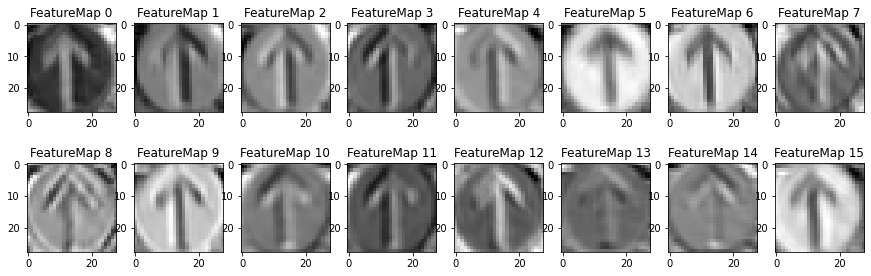

In [0]:
outputFeatureMap(images[2], model, 'conv1')